In [737]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [738]:
num = 300
np.random.seed(100)

In [739]:
def g1(s):
    return s**3

def g1prime(s):
    return 3*(s**2)

def g2(s):
    return np.tanh(s)

def g2prime(s):
    return 1 - (np.tanh(s))**2

def newtons_method(n, x, y, b, fun, fun_prime):
    # 中心化と球状化
    temp = 1/n * b * np.sum(fun_prime(np.dot(b, np.vstack([x, y])))) - 1/n * np.sum(np.dot(x, fun(np.dot(b, np.vstack([x, y])))))
    b_new  = np.abs(temp / np.linalg.norm(temp))
    # 正規化
    diff = np.linalg.norm(b_new - b)
    return b_new, diff

def do_newtons_method(x, y, b, fun, fun_prime):
    threshold = 0.01
    diff = 100
    # 更新する差分が閾値よりも小さくなるまで更新を繰り返す.
    while diff > threshold :
        b, diff = newtons_method(num, x, y, b, fun, fun_prime)
    return b

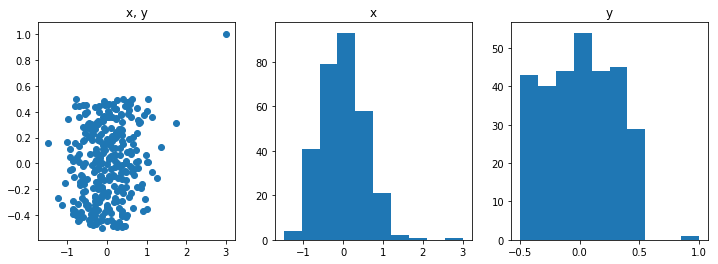

In [740]:
# 外れ値を一つ含めた配列を用意
x = np.insert(np.random.normal(0, 0.5, size=num - 1), -1, 3)
y = np.insert(np.random.rand(num - 1) - 0.5, -1, 1)

fig, (axL, axM, axR) = plt.subplots(ncols=3, figsize=(12, 4))
axL.scatter(x, y)
axL.set_title('x, y')
# y方向はガウスな分布になっており, x方向は非ガウスな分布になっていることがわかる.
axM.hist(x)
axM.set_title('x')
axR.hist(y)
axR.set_title('y')
b = np.array([1, 0])
n = len(x)

Text(0.5,1,'$g(s) = \\tanh{(s)}$')

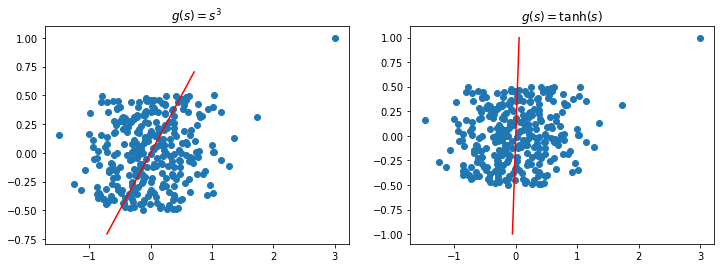

In [741]:
H = np.eye(n) - np.ones(n) / n
X_tilde_temp = (np.dot(np.dot(x, H**2) , x.T)/ n) ** (-1/2)
X_tilde = (np.dot(np.dot(X_tilde_temp, x), H))

# s^3よりもtanh(s)の方が外れ値に対して頑強であることを可視化する.
b = do_newtons_method(X_tilde, y, b, g1, g1prime)
fig, (axL, axR) = plt.subplots(ncols=2, figsize=(12, 4))
axL.scatter(x, y)
axL.plot([-b[0] , b[0]], [-b[1], b[1]], color='r')
axL.set_title(r'$g(s) = s^{3}$')
b = np.array([1, 0])
b = do_newtons_method(X_tilde, y, b, g2, g2prime)
axR.scatter(x, y)
axR.plot([-b[0] , b[0]], [-b[1], b[1]], color='r')
axR.set_title(r'$g(s) = \tanh{(s)}$')